In [106]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder


In [92]:
data = pd.read_csv("C:/Users/marker1/Desktop/ML/list.csv")
data


,Year,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,COEMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,10.5,216
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,9.8,205
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,13.7,265
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,15.0,301
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,11.4,230
...,...,...,...,...,...,...,...,...,...,...
634,2000,VOLVO,V70 AWD TURBO,STATION WAGON - MID-SIZE,2.4,5,A4,Z,14.4,288
635,2000,VOLVO,V70 GLT TURBO,STATION WAGON - MID-SIZE,2.4,5,A4,Z,13.6,274
636,2000,VOLVO,V70 T5 TURBO,STATION WAGON - MID-SIZE,2.3,5,A4,Z,13.9,274
637,2000,VOLVO,V70 T5 TURBO,STATION WAGON - MID-SIZE,2.3,5,M5,Z,13.0,260


In [105]:
pd.isnull(data).any()


Year                False
MAKE                False
MODEL               False
VEHICLE CLASS       False
ENGINE SIZE         False
CYLINDERS           False
TRANSMISSION        False
FUEL                False
FUEL CONSUMPTION    False
COEMISSIONS         False
dtype: bool

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 639 entries, 0 to 638
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              639 non-null    int64  
 1   MAKE              639 non-null    object 
 2   MODEL             639 non-null    object 
 3   VEHICLE CLASS     639 non-null    object 
 4   ENGINE SIZE       639 non-null    float64
 5   CYLINDERS         639 non-null    int64  
 6   TRANSMISSION      639 non-null    object 
 7   FUEL              639 non-null    object 
 8   FUEL CONSUMPTION  639 non-null    float64
 9   COEMISSIONS       639 non-null    int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 50.1+ KB


In [78]:
data.describe()


,Year,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION,COEMISSIONS
count,639.0,639.000000,639.000000,639.000000,639.000000
mean,2000.0,3.265728,5.805947,14.713615,296.809077
std,0.0,1.231012,1.625588,3.307044,65.504178
min,2000.0,1.000000,3.000000,4.900000,104.000000
25%,2000.0,2.200000,4.000000,12.500000,253.000000
50%,2000.0,3.000000,6.000000,14.400000,288.000000
75%,2000.0,4.300000,6.000000,16.600000,343.000000
max,2000.0,8.000000,12.000000,30.200000,582.000000


In [108]:
le = LabelEncoder()
obj_cols = data.select_dtypes('object').columns
for col in obj_cols:
    data[col] = le.fit_transform(data[col])

data

,Year,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,COEMISSIONS
0,2000,0,0,0,1.6,4,1,3,10.5,216
1,2000,0,0,0,1.6,4,6,3,9.8,205
2,2000,0,1,2,3.2,6,4,4,13.7,265
3,2000,0,2,2,3.5,6,1,4,15.0,301
4,2000,0,164,9,1.8,4,1,3,11.4,230
...,...,...,...,...,...,...,...,...,...,...
634,2000,35,303,7,2.4,5,1,4,14.4,288
635,2000,35,304,7,2.4,5,1,4,13.6,274
636,2000,35,305,7,2.3,5,1,4,13.9,274
637,2000,35,305,7,2.3,5,6,4,13.0,260


In [111]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
X = data.drop(['FUEL CONSUMPTION'], axis=1)
y = data['FUEL CONSUMPTION']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Оценка модели
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 0.21080413107393478
R^2 Score: 0.9849091923651305


In [112]:
average_fuel_consumption = data['FUEL CONSUMPTION'].mean()

print(f'Средний расход топлива: {average_fuel_consumption:.2f}')

Средний расход топлива: 14.71


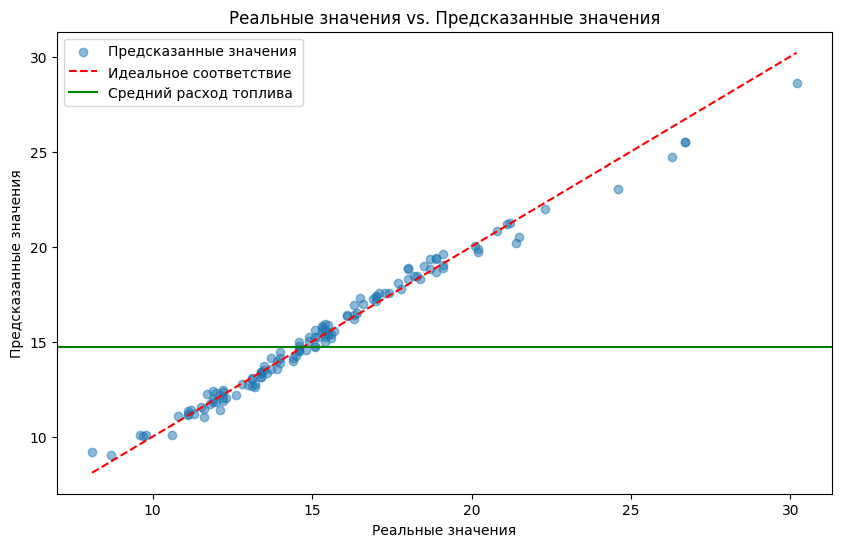

In [113]:
# Построение графика
plt.figure(figsize=(10, 6))

# Реальные значения против предсказанных значений
plt.scatter(y_test, y_pred, alpha=0.5, label='Предсказанные значения')

# Линия идеального соответствия
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Идеальное соответствие')

# Линия среднего расхода топлива
plt.axhline(y=average_fuel_consumption, color='g', linestyle='-', label='Средний расход топлива')

# Подписи и легенда
plt.xlabel('Реальные значения')
plt.ylabel('Предсказанные значения')
plt.title('Реальные значения vs. Предсказанные значения')
plt.legend()
plt.show()
